In [1]:
#Importing our data

In [2]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2018, 1, 1)

end = datetime.datetime(2019, 1, 1)

JPM = web.DataReader("JPM", 'yahoo', start, end)
C = web.DataReader("C", 'yahoo', start, end)
BAC = web.DataReader("BAC", 'yahoo', start, end)

In [3]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,75.180000,74.019997,75.089996,74.360001,15819800.0,72.240433
2018-01-03,74.739998,73.970001,74.349998,74.589996,14657900.0,72.463882
2018-01-04,76.110001,74.660004,75.010002,75.510002,16864900.0,73.357658
2018-01-05,75.769997,74.959999,75.709999,75.410004,15300500.0,73.260521
2018-01-08,75.239998,74.330002,75.169998,74.529999,14215700.0,72.405586


In [4]:
JPM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,94.220001,92.139999,92.889999,92.139999,17009300.0,91.397758
2018-12-26,95.959999,91.110001,92.690002,95.959999,22542900.0,95.186989
2018-12-27,97.150002,93.550003,94.820000,97.040001,20304700.0,96.258286
2018-12-28,98.320000,96.440002,97.949997,96.830002,17963300.0,96.049980
2018-12-31,98.809998,96.769997,97.589996,97.620003,13237200.0,96.833618


In [5]:
#Plot the data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

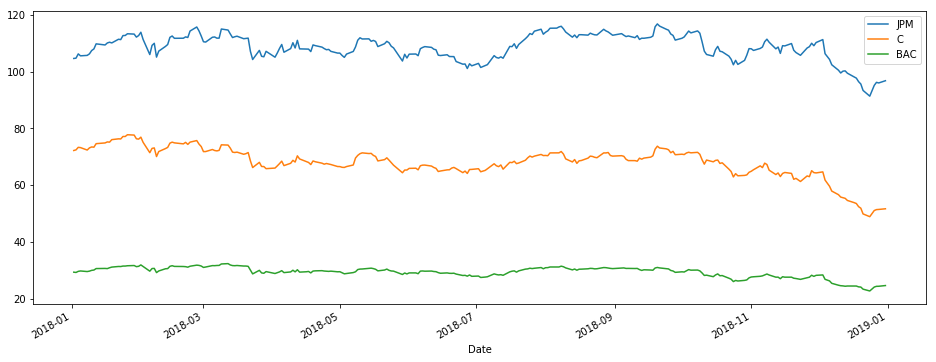

In [7]:
#Plot the closing price
JPM['Adj Close'].plot(label='JPM',figsize=(16,6))
C['Adj Close'].plot(label='C')
BAC['Adj Close'].plot(label='BAC')
plt.legend();

In [8]:
#Compute daily returns 

In [9]:
JPM['returns'] = JPM['Adj Close'].pct_change(1)
C['returns'] = C['Adj Close'].pct_change(1)
BAC['returns'] = BAC['Adj Close'].pct_change(1)

In [10]:
JPM.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2018-01-02,108.019997,106.809998,107.629997,107.949997,13578800.0,104.682083,NaN
2018-01-03,108.489998,107.480003,107.860001,108.059998,11901000.0,104.788765,0.001019
2018-01-04,110.029999,108.199997,108.360001,109.040001,12953700.0,106.289917,0.014326
2018-01-05,109.550003,107.779999,109.260002,108.339996,14155000.0,105.607567,-0.006420
2018-01-08,108.680000,107.699997,108.150002,108.500000,12466500.0,105.763535,0.001477


In [11]:
#Compute cumulative daily returns
JPM['Cumulative Return'] = (1 + JPM['returns']).cumprod()
C['Cumulative Return'] = (1 + C['returns']).cumprod()
BAC['Cumulative Return'] = (1 + BAC['returns']).cumprod()

In [12]:
JPM.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2018-01-02,108.019997,106.809998,107.629997,107.949997,13578800.0,104.682083,NaN,NaN
2018-01-03,108.489998,107.480003,107.860001,108.059998,11901000.0,104.788765,0.001019,1.001019
2018-01-04,110.029999,108.199997,108.360001,109.040001,12953700.0,106.289917,0.014326,1.015359
2018-01-05,109.550003,107.779999,109.260002,108.339996,14155000.0,105.607567,-0.006420,1.008841
2018-01-08,108.680000,107.699997,108.150002,108.500000,12466500.0,105.763535,0.001477,1.010331


In [13]:
#Plot cumulative daily returns

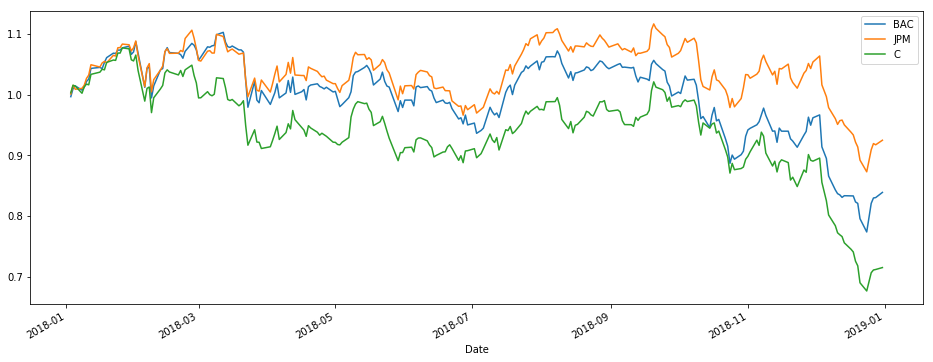

In [14]:
BAC['Cumulative Return'].plot(label='BAC',figsize=(16,6))
JPM['Cumulative Return'].plot(label='JPM',figsize=(16,6))
C['Cumulative Return'].plot(label='C',figsize=(16,6))
plt.legend();

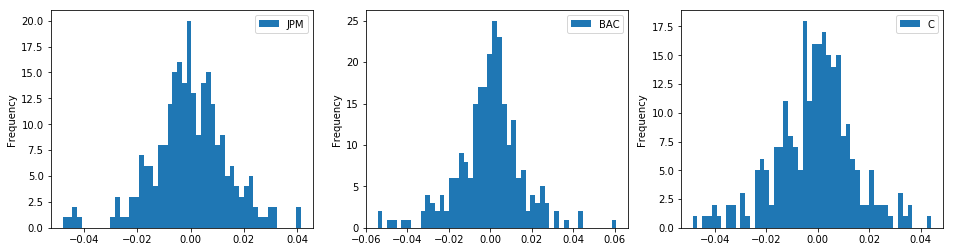

In [15]:
#separate histograms
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

plt.subplot(1,3,1)
JPM['returns'].plot.hist(bins=50,label='JPM')
plt.legend()


plt.subplot(1,3,2)
BAC['returns'].plot.hist(bins=50,label='BAC')
plt.legend()

plt.subplot(1,3,3)
C['returns'].plot.hist(bins=50, label='C')
plt.legend();


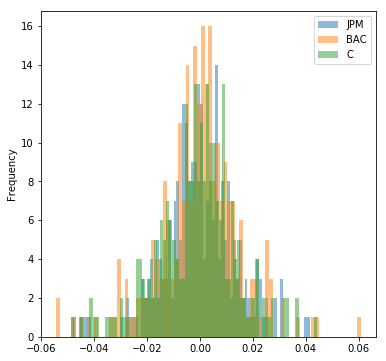

In [16]:
#stacked histogram
JPM['returns'].plot.hist(bins=80,label='JPM',figsize=(6,6),alpha=0.5)
BAC['returns'].plot.hist(bins=80,label='BAC',alpha=0.5)
C['returns'].plot.hist(bins=80, label='C',alpha=0.5)
plt.legend();

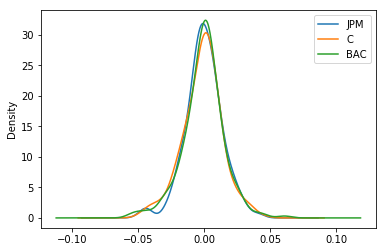

In [17]:
#kernel density graph
JPM['returns'].plot.kde(label='JPM')
C['returns'].plot.kde(label='C')
BAC['returns'].plot.kde(label='BAC')
plt.legend();

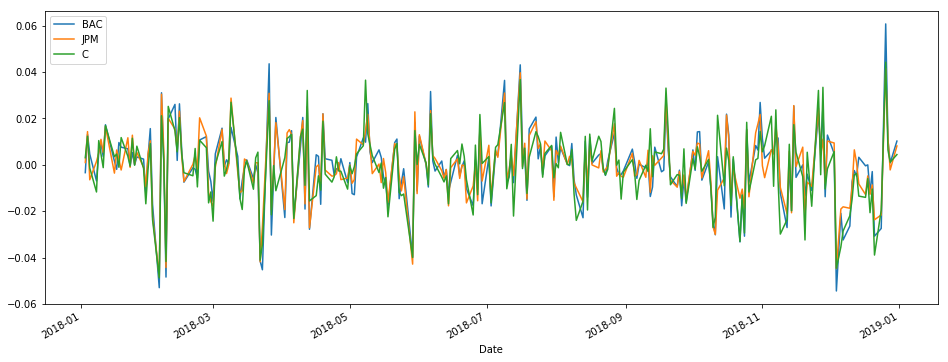

In [18]:
BAC['returns'].plot(label='BAC',figsize=(16,6))
JPM['returns'].plot(label='JPM',figsize=(16,6))
C['returns'].plot(label='C',figsize=(16,6))
plt.legend();

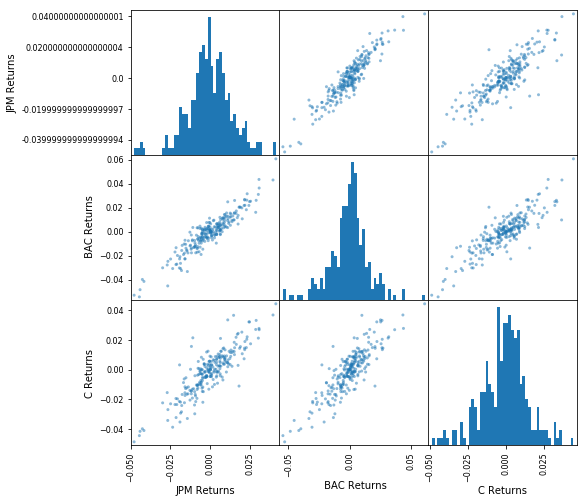

In [19]:
#scatter plot

#aggregate series into a dataframe
banks_df = pd.concat([JPM['returns'],BAC['returns'],C['returns']],axis=1)
banks_df.columns = ['JPM Returns',' BAC Returns','C Returns']
banks_df.dropna(inplace=True)
banks_df

#plot
from pandas.plotting import scatter_matrix
scatter_matrix(banks_df,figsize=(8,8),alpha=0.5,hist_kwds={'bins':50});

In [35]:
banks_df

,JPM Returns,BAC Returns,C Returns
Date,,,
2018-01-03,0.001019,-0.003345,0.003093
2018-01-04,0.014326,0.013087,0.012334
2018-01-05,-0.006420,0.004637,-0.001324
2018-01-08,0.001477,-0.006924,-0.011670
2018-01-09,0.005069,0.004980,0.010466
2018-01-10,0.011004,0.009250,0.004515
2018-01-11,0.005351,0.003601,-0.001190
2018-01-12,0.016510,0.017286,0.016940
2018-01-16,-0.003550,0.001603,0.003514
